In [3]:
import numpy as np
import tensorflow as tf

In [4]:
# load and split data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=2, kernel_size=3, activation='relu', dilation_rate=2, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))  # 2 layers of 128 worked the best (~95%)
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [6]:
# tell the model what loss/optimizer to use
model.compile(
 optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # use crossentropy because there is >=2 classes
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],  # way of evaluating performance
)

In [7]:
model.fit(x_train, y_train, epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"accuracy={accuracy}", f"loss={loss}")

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.5631 - sparse_categorical_accuracy: 0.8927
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1334 - sparse_categorical_accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0970 - sparse_categorical_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9900
Epoch 9/10
1875/1875 [=========

# Creating Your Own Data
1. Open MS Paint
2. Set canvas size to 28px by 28px
3. Draw a digit
4. Save as \<digit\>.png, eg 2.png
5. Drag imgage into project folder (left)
6. Edit `for` loop to pick the correct file names

the result is 1 (69.5469%)


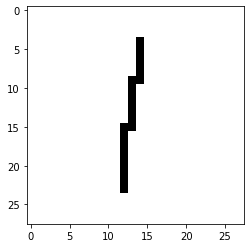

the result is 2 (93.5482%)


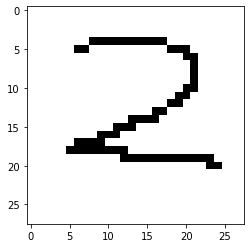

the result is 2 (85.8051%)


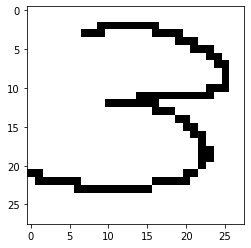

In [8]:
import cv2
import matplotlib.pyplot as plt

for i in [1,2,3]:
  img = cv2.imread(f"{i}.png")[:,:,0]  # read image and convert to grey scale (blackground is black, stroke is white)
  img = np.invert(np.array([img]))  # invert image to make blackground white and stroke black

  pre = model.predict(img)  # list[list[float]]
  print(f"the result is {(np.argmax(pre))} ({pre[0][np.argmax(pre)]*100:.4f}%)")

  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()